In [15]:
import pandas as pd
import numpy as np
import selenium
import traceback
from selenium import webdriver
from selenium.webdriver import ChromeOptions
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import pymysql
from selenium.webdriver.chrome.service import Service
import time
from tqdm.auto import tqdm, trange
import re

In [21]:
# Selenium Webdriver 준비
options = webdriver.ChromeOptions()
service = webdriver.ChromeService()
d = webdriver.Chrome(service=service, options=options)
data_list = []

try:
    for page in range(1, 51):
        url = f"https://www.yna.co.kr/search/index?query=%EB%B6%80%EB%8F%99%EC%82%B0&ctype=A&from=20220822&to=20230822&period=1y&page_no={page}"
        d.get(url)
        
        lis = WebDriverWait(d, 20).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#article_list > div.cts_atclst > ul > li")))
        
        # 검색 결과의 수만큼 URL만 수집
        urls = [li.find_element(By.CSS_SELECTOR, 'a').get_attribute('href') for li in lis]
        
        for news_url in urls:
            d.get(news_url)
            
            title = WebDriverWait(d, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, "#articleWrap > div.content03 > header > h1"))).text.replace("(종합)", "")
            date_selector = WebDriverWait(d, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, "#newsUpdateTime01"))).text
            date = re.search(r"\d{4}-\d{2}-\d{2}", date_selector).group() if date_selector else None

            ps = WebDriverWait(d, 10).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#articleWrap > div.content01.scroll-article-zone01 > div > div > article > p")))
            text = ''.join([p.text for p in ps[:-2]])
            
            data_list.append({
                "url": news_url,
                "title": title,
                "text": text,
                "date": date
            })
            
    df = pd.DataFrame(data_list)

except Exception as e:
    traceback.print_exc()
    
finally:
    d.close()
    d.quit()


In [23]:
df.to_csv('연합뉴스_부동산.csv')

In [25]:
df = pd.read_csv('연합뉴스_부동산.csv', index_col=0)
df

,url,title,text,date
0,https://www.yna.co.kr/view/AKR2023082207885100...,"추경호 ""재정 녹록지 않아…빚 늘리는 모르핀 주사 안놓겠다""",(세종=연합뉴스) 이준서 민경락 박재현 박원희 기자 = 추경호 부총리 겸 기획재정부...,2023-08-22
1,https://www.yna.co.kr/view/AKR2023082212785106...,'254억 횡령' 유혁기 구속기소…유병언 일가 수사 마무리,(인천=연합뉴스) 손현규 기자 = 유병언 전 세모그룹 회장(2014년 사망)의 차남...,2023-08-22
2,https://www.yna.co.kr/view/AKR2023082212520000...,"'유동성 우려' 中부동산업체들, 일부 지방정부에 채무상환 요청",(서울=연합뉴스) 차병섭 기자 = 대형 부동산업체 비구이위안(컨트리가든)의 디폴트(...,2023-08-22
3,https://www.yna.co.kr/view/AKR2023082210705100...,"S&P, 미 은행 5곳 신용등급 강등…""자금조달 위험·수익성 약화""",(서울=연합뉴스) 임상수 기자 = 국제신용평가사 스탠더드앤드푸어스(S&P)는 21일...,2023-08-22
4,https://www.yna.co.kr/view/AKR2023082210700000...,"S&P, 미 은행 5곳 신용등급 강등…""자금조달 위험·수익성 약화""",(서울=연합뉴스) 임상수 기자 = 국제신용평가사 스탠더드앤드푸어스(S&P)는 21일...,2023-08-22
...,...,...,...,...
495,https://www.yna.co.kr/view/AKR2023073111550000...,"'소비진작책 기대' 범중국 증시 상승…""위드코로나 랠리 연상""",(서울=연합뉴스) 차병섭 기자 = 중국 정부의 소비 진작책에 대한 기대감 속에 31...,2023-07-31
496,https://www.yna.co.kr/view/AKR2023073111660009...,"中 ""유급휴가제 전면 시행·탄력 근무제 장려""…소비 촉진 유도",(선양=연합뉴스) 박종국 특파원 = 중국이 내수 소비 촉진을 위해 유급 휴가제를 전...,2023-07-31
497,https://www.yna.co.kr/view/AKR2023073111340000...,세계는 인플레와 싸우는데…중국은 디플레 징후 전역으로 확산,(서울=연합뉴스) 김영현 기자 = 세계 각국이 인플레이션(물가 상승)과의 싸움에 매...,2023-07-31
498,https://www.yna.co.kr/view/AKR2023073110200005...,"울산 제조기업들 ""하반기 경제상황, 상반기와 비슷하거나 악화""",(울산=연합뉴스) 김근주 기자 = 울산 지역 제조기업들은 올 하반기 경제 상황을 상...,2023-07-31


In [26]:
import pickle
import pandas as pd
import numpy as np
import glob
pd.set_option('display.max_columns', None)
from collections import Counter
import operator
from pymongo import MongoClient
import matplotlib.pyplot as plt
plt.rcParams['font.family']='AppleGothic'
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns

from konlpy.corpus import kolaw
from collections import Counter
import nltk

from konlpy.tag import Mecab
from konlpy.corpus import kolaw
from collections import Counter

In [79]:
# NaN 값을 제거
df = df.dropna(subset=['text'])

In [32]:
df['date'].value_counts().sort_index()

2023-07-31    10
2023-08-01    16
2023-08-02    34
2023-08-03    26
2023-08-04    14
2023-08-05     4
2023-08-06    12
2023-08-07    13
2023-08-08    16
2023-08-09    15
2023-08-10    23
2023-08-11    18
2023-08-12     6
2023-08-13    13
2023-08-14    22
2023-08-15    21
2023-08-16    48
2023-08-17    49
2023-08-18    46
2023-08-19     9
2023-08-20    21
2023-08-21    32
2023-08-22    32
Name: date, dtype: int64

In [82]:
# 한글 stop_words다운
!wget https://raw.githubusercontent.com/byungjooyoo/Dataset/main/korean_stopwords.txt
import re
stop_words=[]
with open("korean_stopwords.txt", 'r') as f:
    while True:
        line = f.readline().strip()
        stop_words.append(line)
        if not line: break


--2023-08-22 20:58:31--  https://raw.githubusercontent.com/byungjooyoo/Dataset/main/korean_stopwords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7007 (6.8K) [text/plain]
Saving to: ‘korean_stopwords.txt.1’

korean_stopwords.tx 100%[===================>]   6.84K  --.-KB/s    in 0.001s  

2023-08-22 20:58:31 (10.3 MB/s) - ‘korean_stopwords.txt.1’ saved [7007/7007]



In [83]:
# df의 'text' 열의 모든 텍스트를 결합
text = ' '.join(df['text'])

# 텍스트에서 명사 추출
mecab = Mecab()
nouns = mecab.nouns(text)
nouns = [n for n in nouns if len(n) > 1 and n not in stop_words]

# 명사 빈도수 계산
count = Counter(nouns)

# 상위 20개 명사 추출
top = count.most_common(50)
print(top)


[('중국', 1964), ('부동산', 1348), ('경제', 963), ('시장', 922), ('금융', 856), ('은행', 724), ('금리', 678), ('서울', 658), ('투자', 646), ('하락', 547), ('올해', 546), ('주택', 528), ('상승', 507), ('지수', 484), ('연합뉴스', 481), ('미국', 472), ('대출', 470), ('달러', 470), ('관련', 456), ('위안', 454), ('경기', 442), ('우려', 440), ('기자', 426), ('정부', 422), ('이후', 420), ('업체', 416), ('전망', 410), ('아파트', 409), ('기업', 403), ('최근', 395), ('거래', 386), ('위기', 371), ('가능', 371), ('이날', 370), ('지난해', 364), ('기준', 360), ('당국', 353), ('분기', 344), ('상황', 342), ('대비', 339), ('발표', 336), ('증권', 330), ('한국', 317), ('개발', 312), ('예상', 301), ('가격', 298), ('규모', 295), ('조사', 295), ('포인트', 293), ('정책', 278)]


In [77]:
# NaN 값을 제거
df = df.dropna(subset=['text'])

# df의 'text' 열의 모든 텍스트를 결합
text = ' '.join(df['text'])

# 텍스트에서 명사 추출
nouns = mecab.nouns(text)
nouns = [n for n in nouns if len(n) > 1]

# 명사 빈도수 계산
count = Counter(nouns)

# 워드 클라우드 설정
wordcloud = WordCloud(font_path="font/AppleGothic.ttf",
                      background_color='white',
                      width=800,
                      height=800,
                      max_words=100,
                      max_font_size=150).generate_from_frequencies(count)

# 워드 클라우드 출력
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

ValueError: Only supported for TrueType fonts

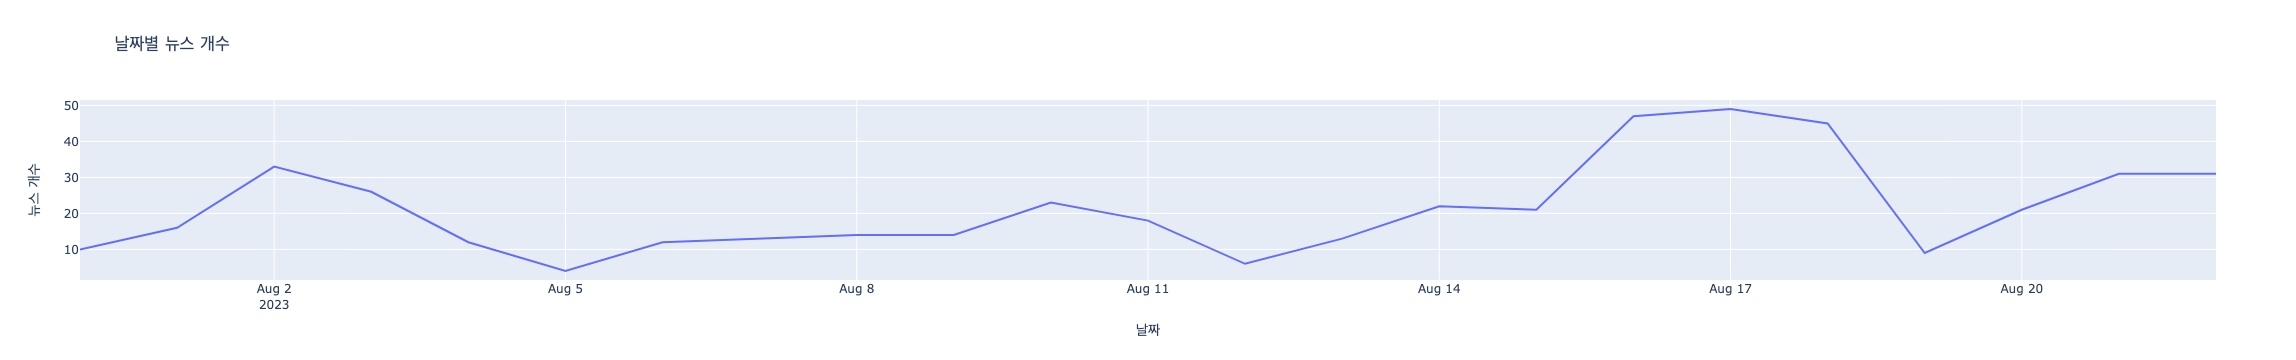

In [84]:
# 'date'를 기준으로 데이터 개수 집계
date_counts = df['date'].value_counts().sort_index()

# plotly를 사용하여 그래프 그리기
fig = px.line(date_counts, x=date_counts.index, y=date_counts.values, title='날짜별 뉴스 개수')
fig.update_layout(xaxis_title='날짜', yaxis_title='뉴스 개수')
fig.show()

In [6]:
import os
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, \
                            roc_auc_score, confusion_matrix, classification_report, \
                            matthews_corrcoef, cohen_kappa_score, log_loss

MODEL_NAME = "klue/bert-base"
model = TFBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3, from_pt=True)
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

NotFoundError: dlopen(/Users/syshin/miniforge3/lib/python3.9/site-packages/tensorflow-plugins/libmetal_plugin.dylib, 0x0006): symbol not found in flat namespace '__ZN10tensorflow8internal10LogMessage16VmoduleActivatedEPKci'